In [3]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Unscaled:

(-3.141592653589793, 3.141592653589793)

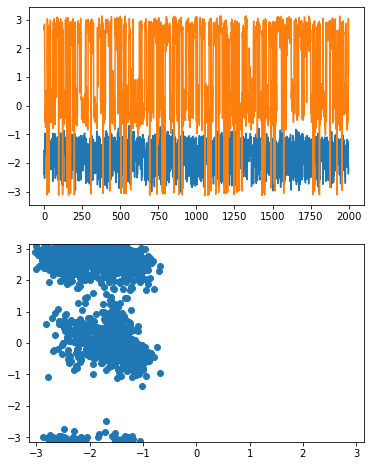

In [5]:
traj = md.load_dcd('./dialanine/diala_normal_traj.dcd', top='./dialanine/alanine-dipeptide-implicit.pdb')
indices = np.array([[4, 6, 8, 14],[6, 8, 14, 16]])
dihedrals_normal = md.compute_dihedrals(traj[:2000], indices, periodic=True)
fig, ax = plt.subplots(2,1)
fig.set_figheight(8)
ax[0].plot(dihedrals_normal)
ax[1].scatter(dihedrals_normal[:,0], dihedrals_normal[:,1])
ax[1].set_ylim(-np.pi, np.pi)
ax[1].set_xlim(-np.pi, np.pi)

# Scaled 0.2:

(-3.141592653589793, 3.141592653589793)

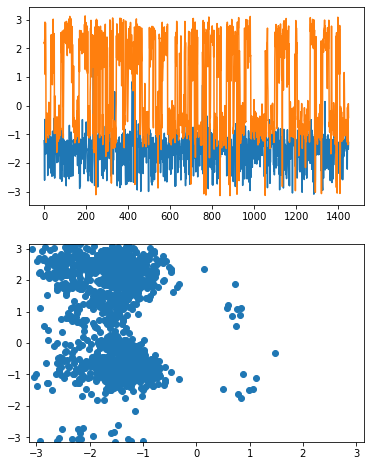

In [189]:
traj = md.load_dcd('./dialanine/diala_scaled_traj.dcd', top='./dialanine/alanine-dipeptide-implicit.pdb')
indices = np.array([[4, 6, 8, 14],[6, 8, 14, 16]])
dihedrals_scaled = mdtraj.compute_dihedrals(traj[:2000], indices, periodic=True)
fig, ax = plt.subplots(2,1)
fig.set_figheight(8)
ax[0].plot(dihedrals_scaled)
ax[1].scatter(dihedrals_scaled[:,0], dihedrals_scaled[:,1])
ax[1].set_ylim(-np.pi, np.pi)
ax[1].set_xlim(-np.pi, np.pi)

# Scaled 0.1:

(-3.141592653589793, 3.141592653589793)

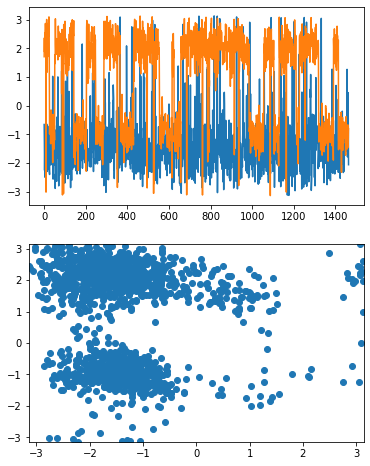

In [201]:
traj = md.load_dcd('./dialanine/diala_scaled-low_traj.dcd', top='./dialanine/alanine-dipeptide-implicit.pdb')
indices = np.array([[4, 6, 8, 14],[6, 8, 14, 16]])
dihedrals_scaled = mdtraj.compute_dihedrals(traj[:2000], indices, periodic=True)
fig, ax = plt.subplots(2,1)
fig.set_figheight(8)
ax[0].plot(dihedrals_scaled)
ax[1].scatter(dihedrals_scaled[:,0], dihedrals_scaled[:,1])
ax[1].set_ylim(-np.pi, np.pi)
ax[1].set_xlim(-np.pi, np.pi)

# Serial tempered:

(-3.141592653589793, 3.141592653589793)

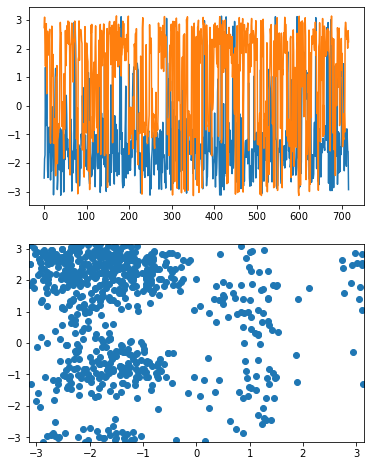

In [410]:
traj = md.load_dcd('./dialanine/diala_gst_traj.dcd', top='./dialanine/alanine-dipeptide-implicit.pdb')
indices = np.array([[4, 6, 8, 14],[6, 8, 14, 16]])
dihedrals_gst = mdtraj.compute_dihedrals(traj[:2000], indices, periodic=True)
fig, ax = plt.subplots(2,1)
fig.set_figheight(8)
ax[0].plot(dihedrals_gst)
ax[1].scatter(dihedrals_gst[:,0], dihedrals_gst[:,1])
ax[1].set_ylim(-np.pi, np.pi)
ax[1].set_xlim(-np.pi, np.pi)

# Autocorrelation:

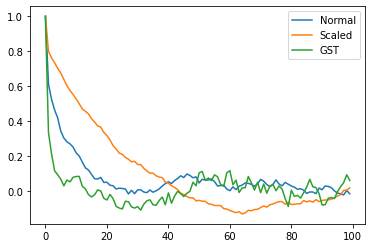

In [394]:
import statsmodels.api as sm

for dihedrals,label in zip([dihedrals_normal[:,1], dihedrals_scaled[:,1], dihedrals_gst[:,1]],
                        ['Normal', 'Scaled', 'GST']):
    C_t = sm.tsa.stattools.acf(dihedrals, fft=True, unbiased=True, nlags=1000)
    plt.plot(C_t[:100], label=label)
plt.legend()

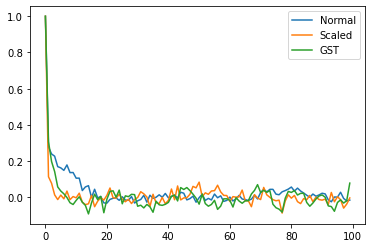

In [395]:
import statsmodels.api as sm

for dihedrals,label in zip([dihedrals_normal[:,0], dihedrals_scaled[:,0], dihedrals_gst[:,0]],
                        ['Normal', 'Scaled', 'GST']):
    C_t = sm.tsa.stattools.acf(dihedrals, fft=True, unbiased=True, nlags=1000)
    plt.plot(C_t[:100], label=label)
plt.legend()

# This is the results using normal gst temperatures:

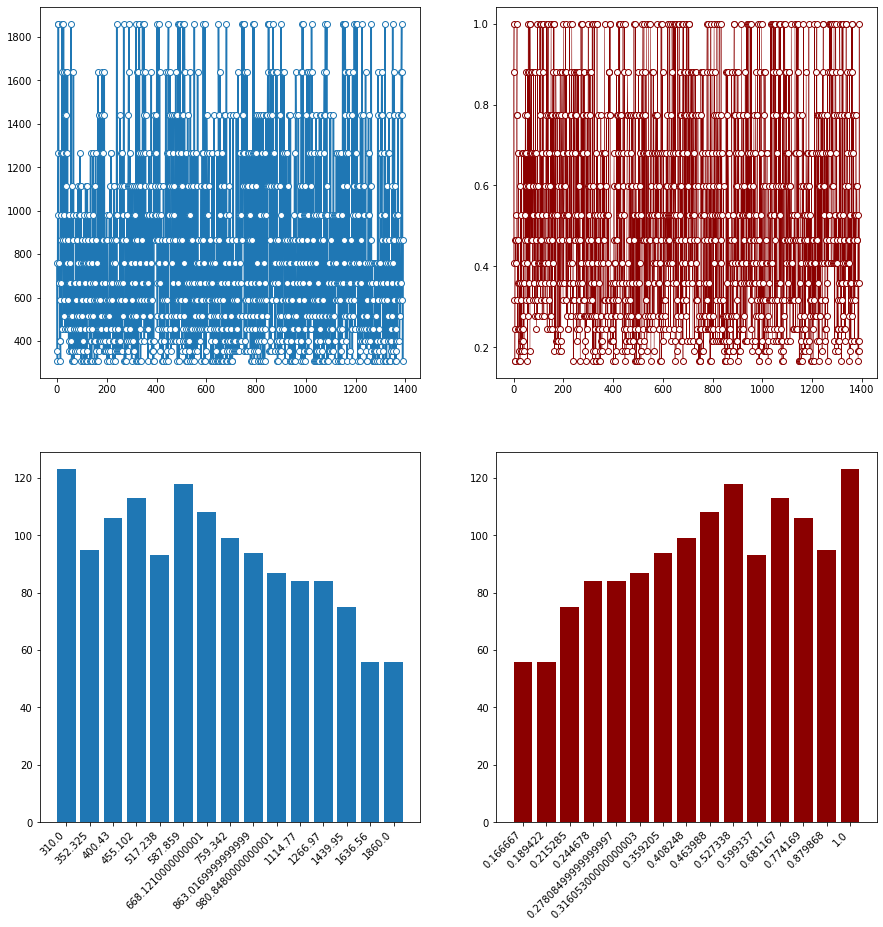

In [406]:
fig, ax = plt.subplots(2,2)
fig.set_figheight(15)
fig.set_figwidth(15)
we = pd.read_csv('./dialanine/diala_gst_temp2.dat', sep='\t', index_col=None)
ax[0,0].plot(we['Temperature (K)'], '-o', mfc='white')

values, counts=np.unique(np.array(we['Temperature (K)']), return_counts=True)
_=ax[1,0].bar(np.arange(len(values)),counts)
_=ax[1,0].set_xticks(np.arange(len(values)))
_=ax[1,0].set_xticklabels(values, rotation=45, ha='right')


ax[0,1].plot(we['Scaling'], '-o', mfc='white', c='darkred', linewidth=0.5)

values, counts=np.unique(np.array(we['Scaling']), return_counts=True)
_=ax[1,1].bar(np.arange(len(values)),counts, color='darkred')
_=ax[1,1].set_xticks(np.arange(len(values)))
_=ax[1,1].set_xticklabels(values, rotation=45, ha='right')

# And results using 50-310

In [427]:
we

,Steps,Temperature (K),PotentialEnergy,Scaling,310K Weight,336.822K Weight,365.964K Weight,397.628K Weight,432.031K Weight,469.411K Weight,...,710.797K Weight,772.297K Weight,839.117K Weight,911.719K Weight,990.602K Weight,1076.31K Weight,1169.43K Weight,1270.62K Weight,1380.55K Weight,1500K Weight
0,102500,1076.310,48.8371,0.288021,0,5.33991,9.76135,13.6028,17.0806,20.1418,...,30.6487,32.1829,33.5936,34.7669,35.7115,36.5658,37.4638,38.3128,38.8774,39.5423
1,103000,1380.550,73.5367,0.224548,0,5.33991,9.76135,13.6028,17.0806,20.1418,...,30.6487,32.1829,33.5936,34.7669,35.7115,36.5658,37.4638,38.3128,38.8774,39.5423
2,103500,990.602,91.9227,0.312941,0,5.33991,9.76135,13.6028,17.0806,20.1418,...,30.6487,32.1829,33.5936,34.7669,35.7115,36.5658,37.4638,38.3128,38.8774,39.5423
3,104000,990.602,64.0967,0.312941,0,5.33991,9.76135,13.6028,17.0806,20.1418,...,30.6487,32.1829,33.5936,34.7669,35.7115,36.5658,37.4638,38.3128,38.8774,39.5423
4,104500,911.719,58.8864,0.340017,0,5.33991,9.76135,13.6028,17.0806,20.1418,...,30.6487,32.1829,33.5936,34.7669,35.7115,36.5658,37.4638,38.3128,38.8774,39.5423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,446500,1500.000,54.3515,0.206667,0,5.33991,9.76135,13.6028,17.0806,20.1418,...,30.6487,32.1829,33.5936,34.7669,35.7115,36.5658,37.4638,38.3128,38.8774,39.5423
689,447000,510.026,116.0630,0.607812,0,5.33991,9.76135,13.6028,17.0806,20.1418,...,30.6487,32.1829,33.5936,34.7669,35.7115,36.5658,37.4638,38.3128,38.8774,39.5423
690,447500,1500.000,79.7011,0.206667,0,5.33991,9.76135,13.6028,17.0806,20.1418,...,30.6487,32.1829,33.5936,34.7669,35.7115,36.5658,37.4638,38.3128,38.8774,39.5423
691,448000,839.117,64.8667,0.369436,0,5.33991,9.76135,13.6028,17.0806,20.1418,...,30.6487,32.1829,33.5936,34.7669,35.7115,36.5658,37.4638,38.3128,38.8774,39.5423


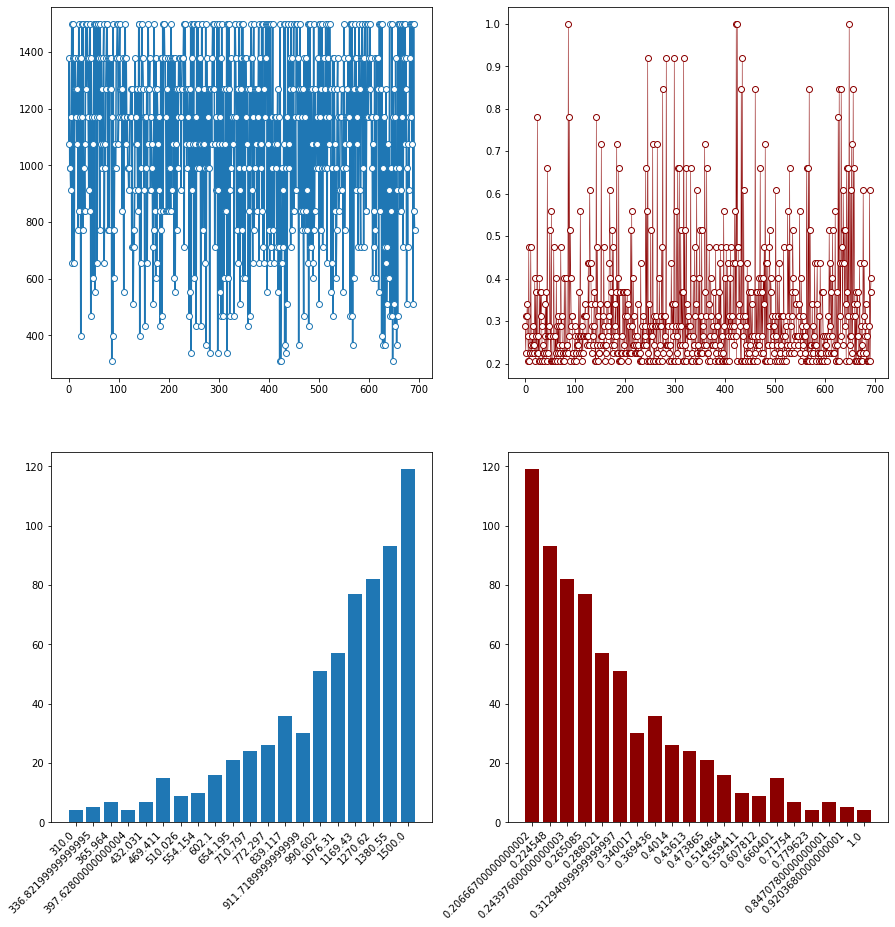

In [426]:
fig, ax = plt.subplots(2,2)
fig.set_figheight(15)
fig.set_figwidth(15)
we = pd.read_csv('./dialanine/diala_gst_temp3.dat', sep='\t', index_col=None)

ax[0,0].plot(we['Temperature (K)'], '-o', mfc='white')
#we = we.iloc[-450:]
values, counts=np.unique(np.array(we['Temperature (K)']), return_counts=True)
_=ax[1,0].bar(np.arange(len(values)),counts)
_=ax[1,0].set_xticks(np.arange(len(values)))
_=ax[1,0].set_xticklabels(values, rotation=45, ha='right')


ax[0,1].plot(we['Scaling'], '-o', mfc='white', c='darkred', linewidth=0.5)

values, counts=np.unique(np.array(we['Scaling']), return_counts=True)
_=ax[1,1].bar(np.arange(len(values)),counts, color='darkred')
_=ax[1,1].set_xticks(np.arange(len(values)))
_=ax[1,1].set_xticklabels(values, rotation=45, ha='right')


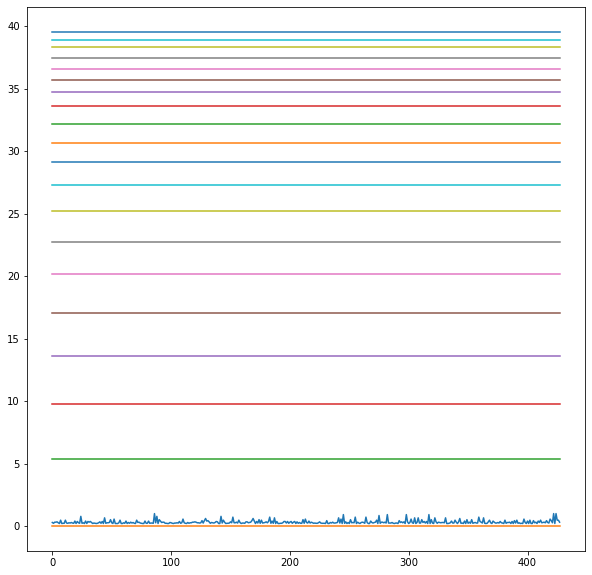

In [423]:
plt.figure(figsize=(10,10))
for col in we.columns[3:]:
    plt.plot(we[col])
#plt.yscale('log')
